<a href="https://colab.research.google.com/github/2303A52359/STML/blob/main/STML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
path = "/content/archive (12).zip"
pd.read_csv(path)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


K-mediod

In [6]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

def k_medoids(data, k, max_iter=100, random_state=None):
    if random_state:
        np.random.seed(random_state)

    n_samples = data.shape[0]
    medoids = data[np.random.choice(n_samples, k, replace=False)]

    prev_medoids = np.copy(medoids)
    labels = np.zeros(n_samples)

    for _ in range(max_iter):
        distances = cdist(data, medoids)
        labels = np.argmin(distances, axis=1)

        for i in range(k):
            cluster_points = data[labels == i]
            if len(cluster_points) == 0:
                continue
            dist_matrix = cdist(cluster_points, cluster_points)
            cost_per_point = np.sum(dist_matrix, axis=1)
            new_medoid = cluster_points[np.argmin(cost_per_point)]
            medoids[i] = new_medoid

        if np.array_equal(medoids, prev_medoids):
            break

        prev_medoids = np.copy(medoids)

    return medoids, labels

def load_data():
    data = pd.DataFrame({
      'ApplicantIncome': [5000, 6000, 7000, 8000, 9000, 10000],
        'CoapplicantIncome': [0, 2000, 2500, 3000, 4000, 5000],
        'LoanAmount': [100, 150, 200, 250, 300, 350],
        'Loan_Amount_Term': [360, 360, 360, 360, 360, 360],
        'Credit_History': [1, 0, 1, 1, 0, 1],
        'Loan_Status': ['Y', 'N', 'Y', 'Y', 'N', 'Y']
    })

    data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

    X = data.drop('Loan_Status', axis=1).values
    y = data['Loan_Status'].values

    return X, y

def train_k_medoids(X_train, y_train, k=2):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    medoids, labels = k_medoids(X_train_scaled, k)

    medoid_labels = np.array([y_train[i] for i in range(len(y_train))])

    return medoids, labels, scaler, medoid_labels

def predict_k_medoids(X_test, medoids, scaler, y_train):
    X_test_scaled = scaler.transform(X_test)

    distances = cdist(X_test_scaled, medoids)

    test_labels = np.argmin(distances, axis=1)

    predictions = [y_train[label] for label in test_labels]

    return np.array(predictions)

if __name__ == '__main__':
    X, y = load_data()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    medoids, labels, scaler, medoid_labels = train_k_medoids(X_train, y_train, k=2)

    predictions = predict_k_medoids(X_test, medoids, scaler, medoid_labels)

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    print("Predictions:", predictions)
    print("True labels:", y_test)


Accuracy: 0.5
Predictions: [1 1]
True labels: [1 0]


KNN

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



def load_data():

    data = pd.DataFrame({
        'ApplicantIncome': [5000, 6000, 7000, 8000, 9000, 10000],
        'CoapplicantIncome': [0, 2000, 2500, 3000, 4000, 5000],
        'LoanAmount': [100, 150, 200, 250, 300, 350],
        'Loan_Amount_Term': [360, 360, 360, 360, 360, 360],
        'Credit_History': [1, 0, 1, 1, 0, 1],  # 1 = good, 0 = bad
        'Loan_Status': ['Y', 'N', 'Y', 'Y', 'N', 'Y']
    })


    data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})


    X = data.drop('Loan_Status', axis=1).values
    y = data['Loan_Status'].values

    return X, y


def train_knn(X_train, y_train, X_test, k=3):

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)


    predictions = knn.predict(X_test_scaled)

    return predictions, knn, scaler


if __name__ == "__main__":


    X, y = load_data()


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    predictions, model, scaler = train_knn(X_train, y_train, X_test, k=3)


    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")


    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, predictions))


    print("\nClassification Report:")
    print(classification_report(y_test, predictions))

Accuracy: 50.00%

Confusion Matrix:
[[0 1]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree

Accuracy: 100.00%

Confusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



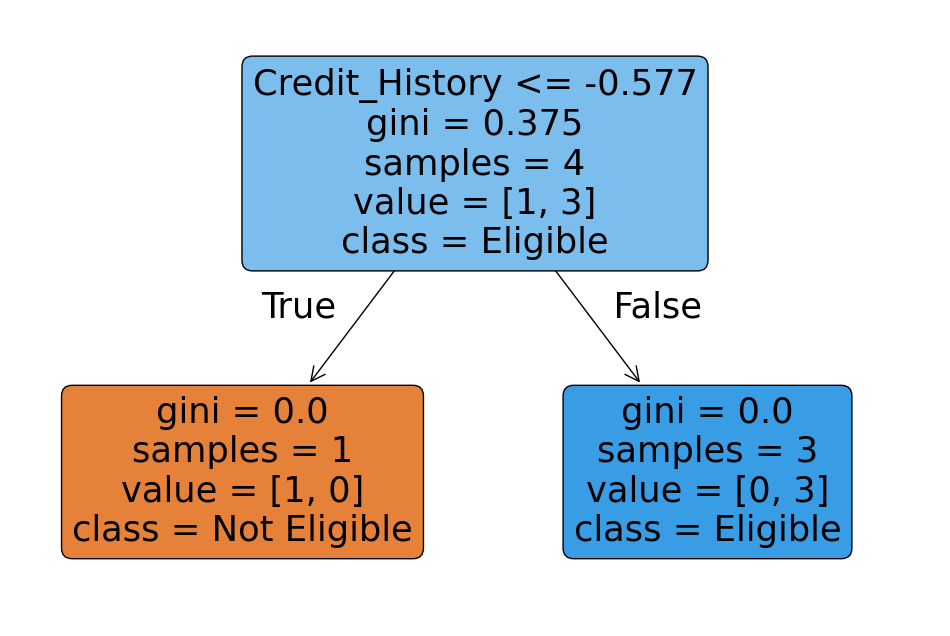

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


def load_data():

    data = pd.DataFrame({
        'ApplicantIncome': [5000, 6000, 7000, 8000, 9000, 10000],
        'CoapplicantIncome': [0, 2000, 2500, 3000, 4000, 5000],
        'LoanAmount': [100, 150, 200, 250, 300, 350],
        'Loan_Amount_Term': [360, 360, 360, 360, 360, 360],
        'Credit_History': [1, 0, 1, 1, 0, 1],  # 1 = good, 0 = bad
        'Loan_Status': ['Y', 'N', 'Y', 'Y', 'N', 'Y']  # Y = eligible, N = not eligible
    })


    data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})


    X = data.drop('Loan_Status', axis=1).values
    y = data['Loan_Status'].values

    return X, y

def train_decision_tree(X_train, y_train, X_test, max_depth=None):

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train_scaled, y_train)


    predictions = clf.predict(X_test_scaled)

    return predictions, clf, scaler


def visualize_tree(clf, feature_names):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,8))
    plot_tree(clf, feature_names=feature_names, class_names=['Not Eligible', 'Eligible'], filled=True, rounded=True)
    plt.show()

if __name__ == "__main__":


    X, y = load_data()


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    predictions, model, scaler = train_decision_tree(X_train, y_train, X_test, max_depth=3)


    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")


    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, predictions))


    print("\nClassification Report:")
    print(classification_report(y_test, predictions))


    visualize_tree(model, feature_names=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

SVM

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


def load_data():

    data = pd.DataFrame({
        'ApplicantIncome': [5000, 6000, 7000, 8000, 9000, 10000],
        'CoapplicantIncome': [0, 2000, 2500, 3000, 4000, 5000],
        'LoanAmount': [100, 150, 200, 250, 300, 350],
        'Loan_Amount_Term': [360, 360, 360, 360, 360, 360],
        'Credit_History': [1, 0, 1, 1, 0, 1],
        'Loan_Status': ['Y', 'N', 'Y', 'Y', 'N', 'Y']
    })


    data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})


    X = data.drop('Loan_Status', axis=1).values
    y = data['Loan_Status'].values

    return X, y


def train_random_forest(X_train, y_train, X_test):

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)


    predictions = rf_model.predict(X_test_scaled)

    return predictions, rf_model, scaler


def train_svm(X_train, y_train, X_test):

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train_scaled, y_train)


    predictions = svm_model.predict(X_test_scaled)

    return predictions, svm_model, scaler

if __name__ == "__main__":

    X, y = load_data()


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    rf_predictions, rf_model, rf_scaler = train_random_forest(X_train, y_train, X_test)


    svm_predictions, svm_model, svm_scaler = train_svm(X_train, y_train, X_test)


    rf_accuracy = accuracy_score(y_test, rf_predictions)
    print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
    print("\nRandom Forest Confusion Matrix:")
    print(confusion_matrix(y_test, rf_predictions))
    print("\nRandom Forest Classification Report:")
    print(classification_report(y_test, rf_predictions))


    svm_accuracy = accuracy_score(y_test, svm_predictions)
    print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
    print("\nSVM Confusion Matrix:")
    print(confusion_matrix(y_test, svm_predictions))
    print("\nSVM Classification Report:")
    print(classification_report(y_test, svm_predictions))

Random Forest Accuracy: 50.00%

Random Forest Confusion Matrix:
[[0 1]
 [0 1]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

SVM Accuracy: 100.00%

SVM Confusion Matrix:
[[1 0]
 [0 1]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5
Predictions: [1 1]
True labels: [1 0]


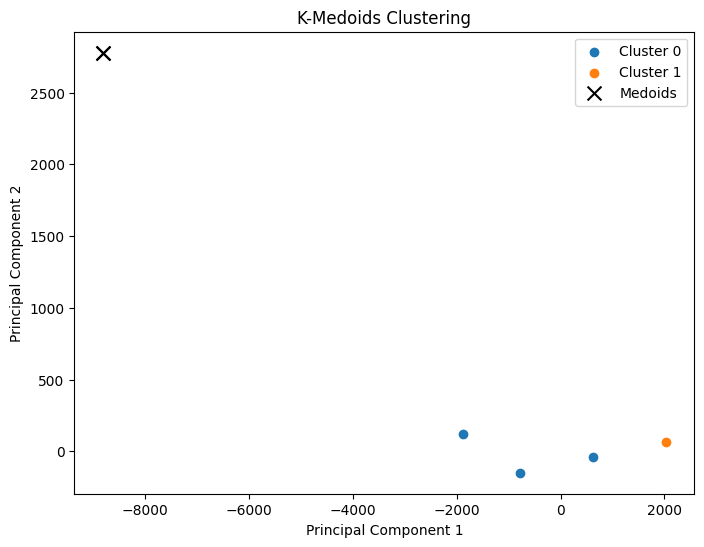

In [15]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def k_medoids(data, k, max_iter=100, random_state=None):
    if random_state:
        np.random.seed(random_state)

    n_samples = data.shape[0]
    medoids = data[np.random.choice(n_samples, k, replace=False)]

    prev_medoids = np.copy(medoids)
    labels = np.zeros(n_samples)

    for _ in range(max_iter):
        distances = cdist(data, medoids)
        labels = np.argmin(distances, axis=1)

        for i in range(k):
            cluster_points = data[labels == i]
            if len(cluster_points) == 0:
                continue
            dist_matrix = cdist(cluster_points, cluster_points)
            cost_per_point = np.sum(dist_matrix, axis=1)
            new_medoid = cluster_points[np.argmin(cost_per_point)]
            medoids[i] = new_medoid

        if np.array_equal(medoids, prev_medoids):
            break

        prev_medoids = np.copy(medoids)

    return medoids, labels

def load_data():
    data = pd.DataFrame({
      'ApplicantIncome': [5000, 6000, 7000, 8000, 9000, 10000],
        'CoapplicantIncome': [0, 2000, 2500, 3000, 4000, 5000],
        'LoanAmount': [100, 150, 200, 250, 300, 350],
        'Loan_Amount_Term': [360, 360, 360, 360, 360, 360],
        'Credit_History': [1, 0, 1, 1, 0, 1],
        'Loan_Status': ['Y', 'N', 'Y', 'Y', 'N', 'Y']
    })

    data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

    X = data.drop('Loan_Status', axis=1).values
    y = data['Loan_Status'].values

    return X, y

def train_k_medoids(X_train, y_train, k=2):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    medoids, labels = k_medoids(X_train_scaled, k)

    medoid_labels = np.array([y_train[i] for i in range(len(y_train))])

    return medoids, labels, scaler, medoid_labels

def predict_k_medoids(X_test, medoids, scaler, y_train):
    X_test_scaled = scaler.transform(X_test)

    distances = cdist(X_test_scaled, medoids)

    test_labels = np.argmin(distances, axis=1)

    predictions = [y_train[label] for label in test_labels]

    return np.array(predictions)

def plot_clusters(X, labels, medoids):
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))

    for i in range(np.max(labels) + 1):
        plt.scatter(X_2d[labels == i, 0], X_2d[labels == i, 1], label=f'Cluster {i}')

    medoids_2d = pca.transform(medoids)
    plt.scatter(medoids_2d[:, 0], medoids_2d[:, 1], color='black', marker='x', s=100, label='Medoids')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.title('K-Medoids Clustering')
    plt.show()

if __name__ == '__main__':
    X, y = load_data()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    medoids, labels, scaler, medoid_labels = train_k_medoids(X_train, y_train, k=2)

    predictions = predict_k_medoids(X_test, medoids, scaler, medoid_labels)

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    print("Predictions:", predictions)
    print("True labels:", y_test)

    plot_clusters(X_train, labels, medoids)
